# **Лабораторная работа 4 "Сравнение центров распределений".**

# **Задача 1**

Сравнить расходы больницы за год (сотни долларов), расположенных за городом и в городе.

В таблице столбец FEXP содержит данные о расходах больницы за год (сотни долларов). В колонке RURAL указан код типа больницы: загородная (код 1) или городская (код 0).

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

#  matplotlib.style.use('ggplot')
%matplotlib inline

from scipy import stats

In [ ]:
df = pd.read_csv('Nursing Home Data_data.csv', sep='\s+')
df

,BED,MCDAYS,TDAYS,PCREV,NSAL,FEXP,RURAL
0,244,128,385,23521,5230,5334,0
1,59,155,203,9160,2459,493,1
2,120,281,392,21900,6304,6115,0
3,120,291,419,22354,6590,6346,0
4,120,238,363,17421,5362,6225,0
5,65,180,234,10531,3622,449,1
6,120,306,372,22147,4406,4998,1
7,90,214,305,14025,4173,966,1
8,96,155,169,8812,1955,1260,0
9,120,133,188,11729,3224,6442,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   BED     52 non-null     int64
 1   MCDAYS  52 non-null     int64
 2   TDAYS   52 non-null     int64
 3   PCREV   52 non-null     int64
 4   NSAL    52 non-null     int64
 5   FEXP    52 non-null     int64
 6   RURAL   52 non-null     int64
dtypes: int64(7)
memory usage: 3.0 KB


**Проверка нормальности распределения**

**Основная гипотеза:** ряд имеет нормальное распределение

**Альтернативная гипотеза:** ряд не нормально распределен

Уровень значимости = 0.05

У нас небольшая выборка данных, поэтому используем критерий Шапиро-Уилка

In [ ]:
res = stats.shapiro(df)
print('p-value: ', res[1])

p-value:  7.066140669459549e-28


p-значение меньше уровня значимости, значит, основную гипотезу о нормальности распределения отвергаем.

Посмотрим это ещё на гистограммах:

In [ ]:
x = df[df['RURAL'] == 1]['FEXP']
y = df[df['RURAL'] == 0]['FEXP']
x.name, y.name = 'загородная больница', 'городская больница'

In [ ]:
def two_histograms(x, y):

    x.hist(alpha=0.5, weights=[1./len(x)]*len(x))
    y.hist(alpha=0.5, weights=[1./len(y)]*len(y))
    plt.axvline(x.mean(), color='red', alpha=0.8, linestyle='dashed')
    plt.axvline(y.mean(), color='blue', alpha=0.8, linestyle='dashed')
    plt.legend([x.name, y.name])

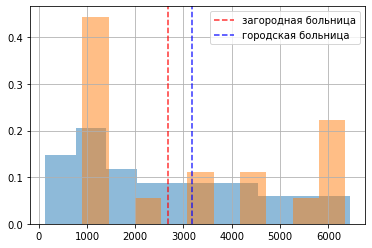

In [ ]:
two_histograms(x, y)

Действительно, распределения имеют существенные отклонения от нормальности. Также наблюдения независимы, следовательно, в качестве центров распределений мы используем не среднее арифметическое, а медиану. Для этого будем использовать критерий Манна-Уитни-Вилкоксона.

**Проверка равенства медиан**

Для проверки гипотезы о равенстве медиан используем критерий Манна-Уитни для независимых выборок.

**Основная гипотеза:** медианы равны (т.е. расходы больницы за год не зависят от того, городская больница или загородная)

**Альтернативная гипотеза:** медианы не равны (т.е. расходы больницы за год зависят от того, городская больница или загородная)

Уровень значимости = 0.05

In [ ]:
res = stats.mannwhitneyu(x, y)
print('p-value:', res[1])

p-value: 0.5318951889778383


p-значение больше уровня значимости, значит, основную гипотезу не отвергаем.

**Вывод:** расходы больницы не зависят от того, является ли больница городской или загородной.

Для более наглядного представления результатов анализа приведем ящиковую диаграмму:

In [ ]:
import seaborn as sns

Text(0.5, 1.0, 'Расходы больницы за год (в сотнях долларов), в зависимости от того, городская она или загородная')

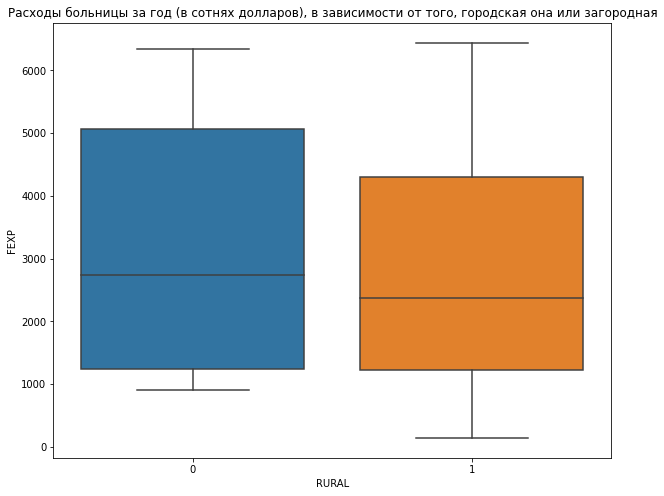

In [ ]:
var = 'RURAL'
f, ax = plt.subplots(figsize=(10, 8))
fig = sns.boxplot(x=df[var], y=df['FEXP'])

plt.title('Расходы больницы за год (в сотнях долларов), в зависимости от того, городская она или загородная')

Таким образом, годовые расходы больницы в городе и за городом различаются статистически незначимо.

# **Задача 2**

Сравнить процент муниципальных служащих, состоящих в профсоюзах в 1982 г. в разных штатах США. Сравниваются штаты, в которых принят закон State right-to-work law (код 1) и те, в которых закон не принят (код 0).

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Unions and State Labor Law_data', sep='\s+')
df2

,STATE,DENS,COMP,RTW,PVT
0,NY,56.9,1,0,31.2
1,MI,49.6,1,0,30.2
2,WA,32.4,1,0,33.1
3,HI,54.6,1,0,24.7
4,AK,30.7,1,0,30.1
5,WV,30.2,0,0,28.5
6,IL,30.6,0,0,26.9
7,OR,35.1,1,0,25.5
8,OH,38.4,1,0,25.3
9,PA,46.2,1,0,23.6


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   STATE   50 non-null     object 
 1   DENS    50 non-null     float64
 2   COMP    50 non-null     int64  
 3   RTW     50 non-null     int64  
 4   PVT     50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [ ]:
x = df2[df2['RTW'] == 1]['DENS']
y = df2[df2['RTW'] == 0]['DENS']
x.name, y.name = 'закон принят', 'закон не принят'

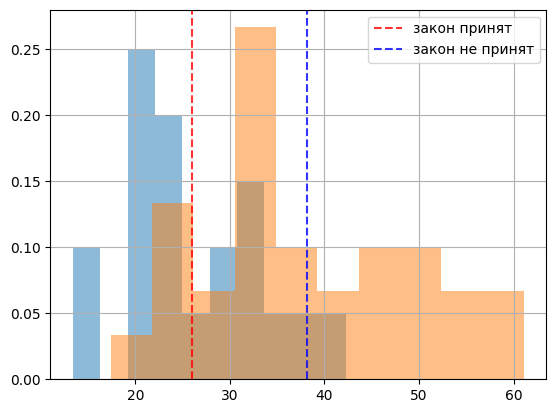

In [ ]:
def two_histograms(x, y):

    x.hist(alpha=0.5, weights=[1./len(x)]*len(x))
    y.hist(alpha=0.5, weights=[1./len(y)]*len(y))
    plt.axvline(x.mean(), color='red', alpha=0.8, linestyle='dashed')
    plt.axvline(y.mean(), color='blue', alpha=0.8, linestyle='dashed')
    plt.legend([x.name, y.name])

two_histograms(x, y)

На глаз сложно определить, нормальное ли распределение признаков. Проверим нормальность с помощью критерия Шапиро-Уилка.

In [ ]:
res = stats.shapiro(x)
print('p-value: ', res[1])

p-value:  0.6464039087295532


In [ ]:
res = stats.shapiro(y)
print('p-value: ', res[1])

p-value:  0.1917286366224289


p-значение в обоих случаях больше уровня значимости, значит, мы не отвергаем основную гипотезу о нормальности распределения

**Проверка равенства средних значений**

**Основная гипотеза:** средние значения равны (т.е. процент муниципальных служащих в штатах не зависит от того, принят ли в нем закон о праве на труд)

**Альтернативная гипотеза:** средние значения не равны (т.е. процент муниципальных служащих в штатах зависит от того, принят ли в нем закон о праве на труд)

Уровень значимости = 0.05

Прежде чем использовать t-критерий Стьюдента, нужно проверить, равны ли дисперсии или нет. Для этого воспользуемся критерием Флигнера-Килина:

In [ ]:
res = stats.fligner(x, y)
print('p-value: ', res[1])

p-value:  0.12569758439648201


p-значение больше уровня значимости 0.05, поэтому гипотезу о равенстве дисперсий не отвергаем. У нас выборки независимые, поэтому гипотезу о равенстве средних значений будем проверять с помощью ttest_ind с equal_var=True

In [ ]:
res = stats.ttest_ind(x, y, equal_var=True)
print('p-value: ', res[1])

p-value:  9.287017631717846e-05


p-значение меньше уровня значимости, значит, основную гипотезу отвергаем.

**Вывод:** процент муниципальных служащих зависит от того, принят в нем закон о праве на труд или нет.

Построим ящиковую диаграмму:

[Text(0.5, 1.0, 'Процент работников государственного сектора в профсоюзах в 1982 г. в зависимости от того, принят ли закон о праве на труд')]

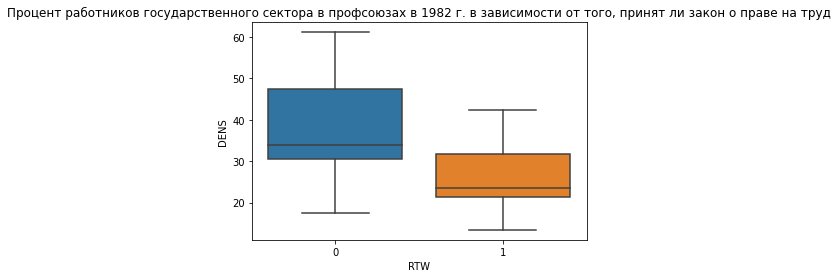

In [ ]:
sns.boxplot(data=df2, x='RTW', y='DENS', dodge=False).set(
    title='Процент работников государственного сектора в профсоюзах в 1982 г. в зависимости от того, принят ли закон о праве на труд'
    )

Из диаграммы видно, что в штатах, где закон о праве на труд не принят, процент муниципальных служащих больше.